## Load Data from CSVs

Resource | Link
--- | ---
L1_Starter_Code | [.ipynb](https://www.udacity.com/api/nodes/5430778793/supplemental_media/l1-starter-codeipynb/download)
enrollments | [.csv](https://www.udacity.com/api/nodes/5430778793/supplemental_media/enrollmentscsv/download)
daily_engagement | [.csv](https://www.udacity.com/api/nodes/5430778793/supplemental_media/daily-engagementcsv/download)
project_submissions | [.csv](https://www.udacity.com/api/nodes/5430778793/supplemental_media/project-submissionscsv/download)
daily_engagement_full | [.csv](https://www.udacity.com/api/nodes/5430778793/supplemental_media/daily-engagement-fullcsv/download)
table_description | [.txt](https://www.udacity.com/api/nodes/5430778793/supplemental_media/table-descriptionstxt/download)


In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
enrollments[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': '2014-11-10',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_udacity': 'True',
 'is_canceled': 'True'}

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

daily_engagement = read_csv("daily_engagement.csv")
project_submissions = read_csv("project_submissions.csv")
print(daily_engagement[0])
print(project_submissions[0])

{'acct': '0', 'utc_date': '2015-01-09', 'num_courses_visited': '1.0', 'total_minutes_visited': '11.6793745', 'lessons_completed': '0.0', 'projects_completed': '0.0'}
{'creation_date': '2015-01-14', 'completion_date': '2015-01-16', 'assigned_rating': 'UNGRADED', 'account_key': '256', 'lesson_key': '3176718735', 'processing_state': 'EVALUATED'}


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table

for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_udacity': True,
 'is_canceled': True}

In [4]:
# Clean up the data types in the engagement table

for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0}

In [5]:
# Clean up the data types in the submissions table

for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'assigned_rating': 'UNGRADED',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

## Investigating the Data

In [6]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def unique_set(data,uniqueColumn):
    uniq_set = set()
    for i in data:
        uniq_set.add(i[uniqueColumn])
    return uniq_set


enrollments_rows_len = len(enrollments)
enrollments_unique_students = unique_set(enrollments,"account_key")
enrollments_unique_students_len = len(enrollments_unique_students)

daily_engagement_rows_len = len(daily_engagement)
daily_engagement_unique_students = unique_set(daily_engagement,"acct")
daily_engagement_unique_students_len = len(daily_engagement_unique_students)

project_submissions_rows_len = len(project_submissions)
project_submissions_unique_students = unique_set(project_submissions,"account_key")
project_submissions_unique_students_len = len(project_submissions_unique_students)


def print_investigating_data(table_name,num_rows,unique_students):
    print("In table {} number of rows is {} and unique students are {}".format(table_name,num_rows,unique_students))


print_investigating_data("enrollments",enrollments_rows_len,enrollments_unique_students_len)

print_investigating_data("daily_engagement",daily_engagement_rows_len,daily_engagement_unique_students_len)

print_investigating_data("project_submissions",project_submissions_rows_len,project_submissions_unique_students_len)


In table enrollments number of rows is 1640 and unique students are 1302
In table daily_engagement number of rows is 136240 and unique students are 1237
In table project_submissions number of rows is 3642 and unique students are 743


## Problems in the Data

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

for engagement in daily_engagement:
    engagement["account_key"] = engagement["acct"]
    del[engagement["acct"]]

daily_engagement[0]

{'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0,
 'account_key': '0'}

## Missing Engagement Records

In [8]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

daily_engagement_unique_students = unique_set(daily_engagement,"account_key")
for enrollment in enrollments:
    if enrollment["account_key"] not in daily_engagement_unique_students:
        print(enrollment)
        break

{'account_key': '1219', 'status': 'canceled', 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'is_canceled': True}


## Checking for More Problem Records

In [9]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

problem_students = 0

for enrollment in enrollments:
    if enrollment["account_key"] not in daily_engagement_unique_students and enrollment["join_date"] != enrollment["cancel_date"]:
        print(enrollment)
        problem_students += 1

problem_students

{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 59, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'days_to_cancel': 99, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1101', 'status': 'current', 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'cancel_date': None, 'days_to_cancel': None, 'is_udacity': True, 'is_canceled': False}


3

## Tracking Down the Remaining Problems

In [10]:
# Create a set of the account keys for all Udacity test accounts

udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [11]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts

def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

## Refining the Question

In [12]:
# Remove Udacity test accounts from all three tables

non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


In [13]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {} 
for enrollment in non_udacity_enrollments:
    if not enrollment["is_canceled"] or enrollment["days_to_cancel"] > 7 :
        account_key = enrollment["account_key"]
        enrollment_date = enrollment["join_date"]
        if (account_key not in paid_students or enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
len(paid_students)

995

## Getting Data from First Week

In [14]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [15]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

def remove_free_trial_cancels(data):
    new_data = []
    for i in data:
        if i["account_key"] in paid_students:
            new_data.append(i)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

for i in paid_engagement:
    if i["num_courses_visited"] > 0:
        i["has_visited"] = 1
    else:
        i["has_visited"] = 0

paid_engagement_in_first_week = []

for i in paid_engagement:
    account_key = i["account_key"]
    join_date = paid_students[account_key]
    engagement_record_date = i["utc_date"]
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(i)
        
len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [16]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.

def groupping(data,key_name):
    dict_groupping = defaultdict(list)
    for i in data:
        key = i[key_name]
        dict_groupping[key].append(i)
    return dict_groupping

engagement_by_account = groupping(paid_engagement_in_first_week,'account_key')


In [17]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

def sum_groupped(groupped,field_name):
    dict_sum_groupped = {}
    for i,j in groupped.items():
        total = 0
        for k in j:
            total += k[field_name]
        dict_sum_groupped[i] = total
    return dict_sum_groupped

total_minutes_by_account = sum_groupped(engagement_by_account,'total_minutes_visited')


In [18]:
import numpy as np

def print_data(data):
    print('Mean:', np.mean(data))
    print('Standard deviation:', np.std(data))
    print('Minimum:', np.min(data))
    print('Maximum:', np.max(data))

# Summarize the data about minutes spent in the classroom

total_minutes = list(total_minutes_by_account.values())

print_data(total_minutes)

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## Debugging Data Analysis Code

In [19]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

student_max_min = None
max_minutes = 0
for i,j in total_minutes_by_account.items():
    if j > max_minutes:
        max_minutes = j
        student_max_min = i

print(max_minutes)

for i in paid_engagement_in_first_week:
    if i["account_key"] == student_max_min:
        print(i)

3564.7332644989997
{'utc_date': datetime.datetime(2015, 7, 9, 0, 0), 'num_courses_visited': 4, 'total_minutes_visited': 850.519339666, 'lessons_completed': 4, 'projects_completed': 0, 'account_key': '163', 'has_visited': 1}
{'utc_date': datetime.datetime(2015, 7, 10, 0, 0), 'num_courses_visited': 6, 'total_minutes_visited': 872.633923334, 'lessons_completed': 6, 'projects_completed': 0, 'account_key': '163', 'has_visited': 1}
{'utc_date': datetime.datetime(2015, 7, 11, 0, 0), 'num_courses_visited': 2, 'total_minutes_visited': 777.018903666, 'lessons_completed': 6, 'projects_completed': 0, 'account_key': '163', 'has_visited': 1}
{'utc_date': datetime.datetime(2015, 7, 12, 0, 0), 'num_courses_visited': 1, 'total_minutes_visited': 294.568774, 'lessons_completed': 2, 'projects_completed': 0, 'account_key': '163', 'has_visited': 1}
{'utc_date': datetime.datetime(2015, 7, 13, 0, 0), 'num_courses_visited': 3, 'total_minutes_visited': 471.2139785, 'lessons_completed': 1, 'projects_completed': 

## Lessons Completed in First Week

In [20]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

total_number_of_lessons = sum_groupped(engagement_by_account,"lessons_completed")
total_lessons_values = list(total_number_of_lessons.values())
print_data(total_lessons_values)

Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [21]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

total_number_days_of_students_visited = sum_groupped(engagement_by_account,"has_visited")
total_courses_visited = list(total_number_days_of_students_visited.values())
print_data(total_courses_visited)

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [22]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passing_engagement = []
non_passing_engagement = []

pass_subway_project = set()

for i in paid_submissions:
    if i["lesson_key"] in subway_project_lesson_keys and (i["assigned_rating"] == "PASSED" or i["assigned_rating"] == "DISTINCTION" ):
        pass_subway_project.add(i["account_key"])

for i in paid_engagement_in_first_week:
    if i["account_key"] in pass_subway_project:
        passing_engagement.append(i)
    else:
        non_passing_engagement.append(i)
        
print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the Two Student Groups

In [23]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).
passing_engagement_account = groupping(passing_engagement,"account_key")
non_passing_engagement_account = groupping(non_passing_engagement,"account_key")

print("Total minutes visited")
print("\npassing students")
passing_students_mins = sum_groupped(passing_engagement_account,"total_minutes_visited")
print_data(list(passing_students_mins.values()))
print("\nnon passing students")
non_passing_students_mins = sum_groupped(non_passing_engagement_account,"total_minutes_visited")
print_data(list(non_passing_students_mins.values()))

print("\n\nLessons completed")
print("\npassing students")
passing_students_lessons = sum_groupped(passing_engagement_account,"lessons_completed")
print_data(list(passing_students_lessons.values()))
print("\nnon passing students")
non_passing_students_lessons = sum_groupped(non_passing_engagement_account,"lessons_completed")
print_data(list(non_passing_students_lessons.values()))

print("\n\nHas visited")
print("\npassing students")
passing_students_visited = sum_groupped(passing_engagement_account,"has_visited")
print_data(list(passing_students_visited.values()))
print("\nnon passing students")
non_passing_students_visited = sum_groupped(non_passing_engagement_account,"has_visited")
print_data(list(non_passing_students_visited.values()))

Total minutes visited

passing students
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997

non passing students
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


Lessons completed

passing students
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36

non passing students
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


Has visited

passing students
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7

non passing students
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7


## Making Histograms

Total minutes visited

passing students


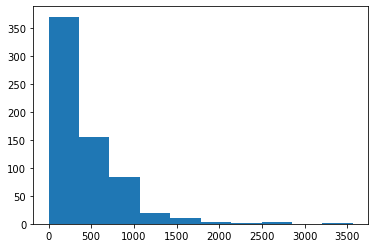

In [24]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%matplotlib inline
import matplotlib.pyplot as plt

def print_histogram(data):
    plt.hist(data)
    
print("Total minutes visited")
print("\npassing students")
print_histogram(list(passing_students_mins.values()))



non passing students


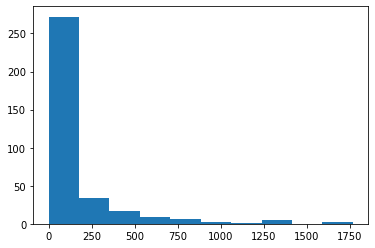

In [25]:

print("\nnon passing students")
print_histogram(list(non_passing_students_mins.values()))




Lessons completed

passing students


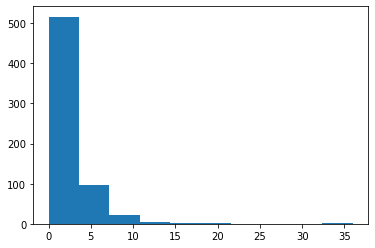

In [26]:

print("\n\nLessons completed")
print("\npassing students")
print_histogram(list(passing_students_lessons.values()))



non passing students


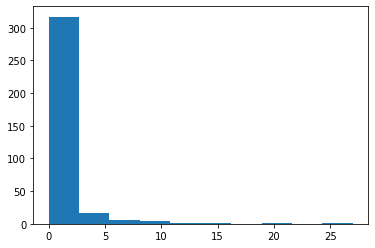

In [27]:

print("\nnon passing students")
print_histogram(list(non_passing_students_lessons.values()))




Has visited

passing students


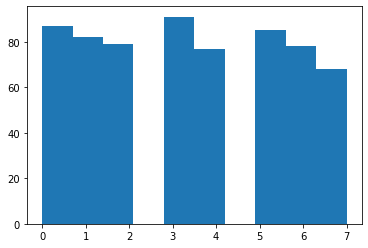

In [28]:

print("\n\nHas visited")
print("\npassing students")
print_histogram(list(passing_students_visited.values()))



non passing students


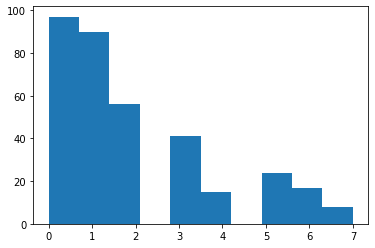

In [29]:

print("\nnon passing students")
print_histogram(list(non_passing_students_visited.values()))


## Improving Plots and Sharing Findings

In [30]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.